### Approximating Sigmoid function by weighted su of exponential terms in bounded interval

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Functions

In [2]:
def one_step_forward(x,weights,vor):
    '''
    One step regression. Based-on weight and power of exponential terms, this function predict the y_value of each point
    in x.
    
    Parameters
    -------------
    x: list of floats
        x_value of estimation points
    weightss: list of floats
        Weights of exponential terms
    vor: list of floats
        Powers of exponential terms 
    
    Returns
    ---------
    exped:2-D array of floats 
        Array of applied exponential function on x-points (without weights)
    y_hat: 1-D array of floats 
        Predicted y_values regarding each point in x
    '''
    num_of_exps=len(weights[0])
    # 2-D array to record each point'sexponentilly mapped value by each exp term
    exped=np.zeros((len(x),num_of_exps))
    # final predictions of y
    predictions=np.zeros((len(x),1))
    
    # calculate each exponential variate's value 
    for i in range(num_of_exps):
        exped[:,i]=np.exp(vor[0,i]*x).reshape(-1)
        
        # accumulate predictions of each term to make final prediction
        predictions[:,0]+=weights[0,i]*exped[:,i]
    y_hat=np.sum(predictions,axis=1)

    return exped,y_hat

In [3]:
def loss(y,y_hat):
    """
    Calculate the loss function which is Sum of Squered Errors.
    
    Parameters
    -------------
    y: list of floats
        Correct y_values of points
        
    y_hat: list of floats
        Predictions by forward part
        
    Returns
    ---------
    int.... loss value
    """
    return (1/len(y))*np.sum(np.power((y-y_hat),2))

In [4]:
def one_step_backward(num_of_exps,weights,x,exped,y_hat,y):
    """
    One step backward move for Gradient descent.
    
    Parameters
    -------------
    num_of_exps: int
        number of exponential terms
    weights: list of floats
        Weights of exponential terms in the utility function
    x: list of floats
        x_values of points of estimation
    exped: 2-D array
        Exponentially mapped x_points
    y_hat: list of floats
        Predictions by forward part
    y: list of floats
        Correct y_values of points
        
    Returns
    ---------
    dw: 1-D array of floats
        Derivatives of loss function regarding exponential terms' weights 
    dv: 1-D array of floats
        Derivatives of loss function regarding exponential terms' powers
    """
    # derivates of loss regarding weights and vorfaktoren
    dvor=np.zeros((len(x),num_of_exps))
    dweights=np.zeros((len(x),num_of_exps))
    
    # for each exponential term
    for i in range(num_of_exps):
        # derivative wrt powers
        dvor[:,i]=(-2*(y-y_hat))*weights[0,i]*exped[:,i]*x[:,0]
        # derivative wrt weights
        dweights[:,i]=(-2*(y-y_hat))*exped[:,i]
    
    # mean of derivatives for all points
    dv=(1/len(x))*np.sum(dvor,axis=0)
    dw=(1/len(x))*np.sum(dweights,axis=0)
    
    return dw,dv

In [5]:
def update(weights,vor,dw,dv,step,coef):
    """
    Update the weight and power values w.r.t their derivative and previous values. 
    
    Parameters
    -------------
    weights: list of floats
        Weights of exponential terms in the utility function
    vor: list of floats
        Vorfaktors of exponential terms in the utility function
    dw: list of floats
        Derivative of loss function w.r.t weights of each esxponential term
    dv: list of floats
        Derivative of loss function w.r.t powers of each esxponential term
    step: int
        Step numebr of gradient descent. ( not used) 
    coef: float
        Learning rate
        
    Returns
    ---------
    weights: list of floats
        Updated weights of exponential terms
    vor: list of floats
        Updated vorfaktors of exponential terms
    """
    weights[0,:]=weights[0,:]-coef*dw
    vor[0,:]=vor[0,:]-coef*dv
    return weights,vor

In [6]:
def initialize(num_of_exps):
    """
    Initialize weights and powers of exponential terms.
    """
    weights=np.random.random((1,num_of_exps))
    vor=np.random.random((1,num_of_exps))
    return weights,vor

In [7]:
def utility(x,weights,vor):
    """
    Calculate utility (y_value) of points based on their weights and powers. Here, utility is weightd sum of exponential terms:
    U(p)=w_1 x e^(v_1 x p) + w_2 x e^(v_2 x p) + ... 
    
    Parameters
    -------------
    x: list of floats
        Values 
    weightss: list of floats
        Weights of exponential terms
    vor: list of floats
        Powers of exponential terms 
    
    Returns
    ---------
    res:1-D array of floats 
        Utility of values  
    """
    #result
    res=np.zeros(len(x))
    # Sum of exponentials utility
    for i in range(len(weights)):
        res+=weights[i]*np.exp(x*vor[i])
    return res

In [8]:
def sigmoid(z):
    """
    Returns sigmoid function in the given points
    """
    return 1/(1 + np.exp(-z))

## Gradient Descent


In [9]:
def gradient_descent(num_of_exps, max_iteration, step_coeff):
    """
    A gradient descent optimizer to find the best weights and powers of exponentials terms to estimate Sigmoid function.
    
    Parameters
    -------------
    num_of_exps: int
        Number of exponential temrs in the estimator 
    max_iteration: int
        Maximum number of optimization iterations
    step_coeff: float
        Learning rate 
    
    Returns
    ---------
    weights:1-D array of floats 
        Weights of exponential terms 
    vors: 1-D array of floats 
         Powers of exponential terms
    losses: list of floats 
        List of loss values in all iterations   
    """
    weights,vor=initialize(num_of_exps)
    losses=[]
    for i in range(max_iteration):
        # forward
        exped,y_hat=one_step_forward(x,weights,vor)
        # calculate loss
        l=loss(y,y_hat)
        losses.append(l)
        # backward
        dw,dv=one_step_backward(num_of_exps,weights,x,exped,y_hat,y)
        
        # updating the values
        
        #if i==1000:
        #    step_coeff=step_coeff*10
        #if i==10000:
        #    step_coeff=step_coeff*10
        #if i==100000:
        #    step_coeff=step_coeff*10
        
        weights,vor=update(weights,vor,dw,dv,i,step_coeff)
    
    return weights,vor,losses
   

#### fittings

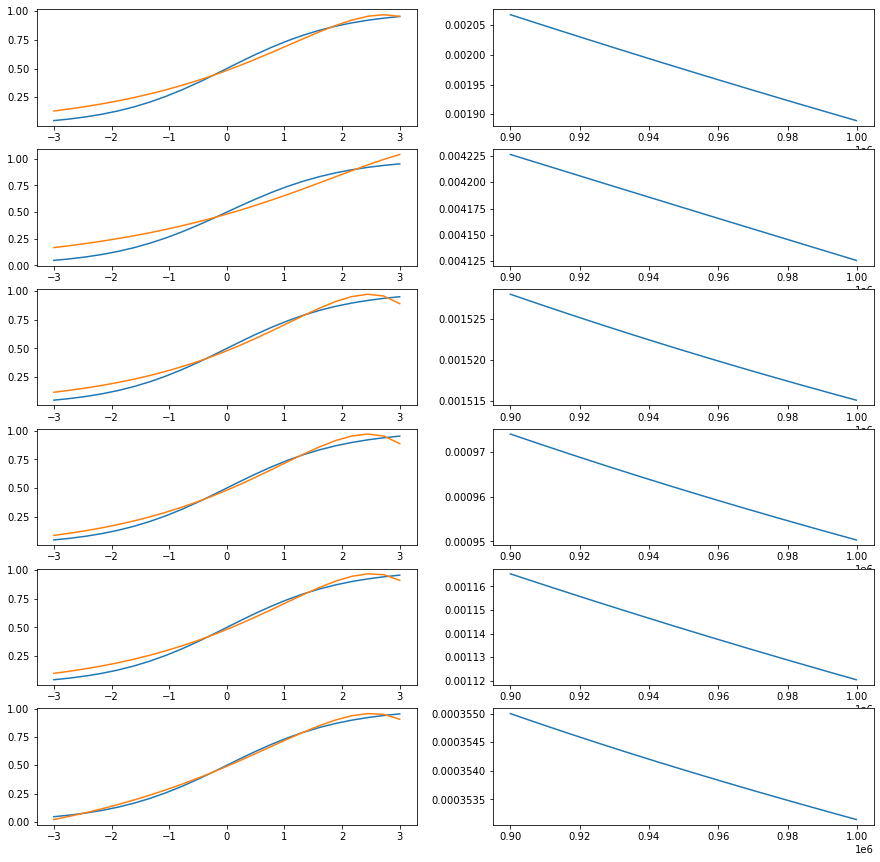

In [41]:
############################### Bounded interval 
#x = np.linspace(-3, 3, 100) 

b=3                       # maximum length of a symmetric interval around zero
n=40                      # number of points

# non-uniform distribution of points around zero 
p1=np.linspace(-b,-0.5,int(n/4))  
p2=np.linspace(-0.5,0.5,int(n/2))
p3=np.linspace(0.5,b,int(n/4))

x=np.hstack([p1,p2,p3])    # approximation points

y=sigmoid(x)               # correct values of sigmoid function in our points
x=x.reshape(len(x),1)
max_iteration=1000000      # maximum itreations of gradient descent

# define empty variables to record results
weights=[]
vors=[]
losses=[]
#####################################  fitting and plotting
# for number of 5 to 10 exponential terms

fig, ax=plt.subplots(6,2,figsize=(15,15))
for i,n in enumerate([5,6,7,8,9,10]):
    # fitting
    w,v,l=gradient_descent(num_of_exps=n, max_iteration=max_iteration, step_coeff=1e-5)
    weights.append(w.reshape(-1))
    vors.append(v.reshape(-1))
    losses.append(l)
    
    # approximated values 
    x2=x.reshape(-1)
    y_hat=utility(x2,weights[i],vors[i])
    
    ax[i][0].plot(x2,y)
    ax[i][0].plot(x2,y_hat)
    
    iteration=np.arange(0,max_iteration,100)
    ls=np.array(losses[i])[iteration]
    ax[i][1].plot(iteration[-1000:-1],ls[-1000:-1])

# Extended version


In the extended version we not only consider the approximation of y_value of points, but also consider to mimic the dy/dx and d2y/dx2 of Sigmoid function as well in order to address needed characterisitcs of Sigmoid.

In [10]:
def one_step_forward_with_moments(x,weights,vor):

    num_of_exps=len(weights[0])
    exped=np.zeros((len(x),num_of_exps))
    b_exped=np.zeros((len(x),num_of_exps))
    b2_exped=np.zeros((len(x),num_of_exps))
    
    predictions=np.zeros((len(x),1))
    d_predictions=np.zeros((len(x),1))
    d2_predictions=np.zeros((len(x),1))
    
    for i in range(num_of_exps):
        exped[:,i]=np.exp(vor[0,i]*x).reshape(-1)
        b_exped[:,i]=vor[0,i]*exped[:,i]
        b2_exped[:,i]=np.power(vor[0,i],2)*exped[:,i]
        
        predictions[:,0]+=weights[0,i]*exped[:,i]
        d_predictions[:,0]+=weights[0,i]*b_exped[:,i]
        d2_predictions[:,0]+=weights[0,i]*b2_exped[:,i]
    #     
    y_hat=np.sum(predictions,axis=1)
    #
    dyhat_dx=np.sum(d_predictions,axis=1)
    dy_dx=np.exp(-x)/np.power((np.exp(-x)+1),2)
    #
    d2yhat_dx=np.sum(d2_predictions,axis=1)
    d2y_dx=-1*np.exp(-1*x)/np.power((1+np.exp(-1*x)),3)
    
    return exped,y_hat, b_exped,dyhat_dx,dy_dx,b2_exped,d2yhat_dx,d2y_dx

In [11]:
def loss_with_moments(y,y_hat,dy_dx,dyhat_dx, d_coeff,d2y_dx,d2yhat_dx,d2_coeff):
    l1=(1/len(y))*np.sum(np.power((y-y_hat),2))
    l2=(1/len(y))*np.sum(np.power((dy_dx-dyhat_dx),2))
    l3=(1/len(y))*np.sum(np.power((d2y_dx-d2yhat_dx),2))
    return l1+d_coeff*l2 + d2_coeff*l3

In [12]:
def one_step_backward_with_moments(num_of_exps,weights,x,exped,y_hat,y,b_exped,dyhat_dx,dy_dx,d_coeff,b2_exped,d2yhat_dx,d2y_dx,d2_coeff):
    # final derivatives
    dvor=np.zeros((len(x),num_of_exps))
    dweights=np.zeros((len(x),num_of_exps))
    
    # for first and second derivatives
    dx_diff=dy_dx.reshape(len(x),1) -dyhat_dx.reshape(len(x),1)
    d2x_diff=d2y_dx.reshape(len(x),1) -d2yhat_dx.reshape(len(x),1)
    
    for i in range(num_of_exps):
        # y- part
        m0_vor=(-2*(y-y_hat))*weights[0,i]*exped[:,i]*x[:,0]
        m0_weight=(-2*(y-y_hat))*exped[:,i]
        
        # first derivative
        m1_vor=2*dx_diff*((-1)*weights[0,i]*(exped[:,i]+b_exped[:,i]*x[:,0])).reshape(len(x),1)
        m1_weight=2*dx_diff*((-1)*b_exped[:,i]).reshape(len(x),1)
        
        # Second derivative
        m2_vor=2*d2x_diff*((-1)*weights[0,i]*(2*b_exped[:,i]+b2_exped[:,i]*x[:,0])).reshape(len(x),1)
        m2_weight=2*dx_diff*((-1)*b2_exped[:,i]).reshape(len(x),1)
        
        # sum of all derivative parts
        dvor[:,i]= m0_vor + (d_coeff*m1_vor).reshape(-1) + (d2_coeff*m2_vor).reshape(-1)        
        dweights[:,i]= m0_weight + (d_coeff*m1_weight).reshape(-1) + (d2_coeff*m2_weight).reshape(-1)
        
    dv=(1/len(x))*np.sum(dvor,axis=0)
    dw=(1/len(x))*np.sum(dweights,axis=0)
    return dw,dv

In [13]:
def gradient_descent_with_moments(num_of_exps, max_iteration, step_coeff,d_coeff,d2_coeff):

    weights,vor=initialize(num_of_exps)
    losses=[]
    for i in range(max_iteration):
        exped,y_hat, b_exped,dyhat_dx,dy_dx,b2_exped,d2yhat_dx,d2y_dx=one_step_forward_with_moments(x,weights,vor)
        l=loss_with_moments(y,y_hat,dy_dx,dyhat_dx, d_coeff,d2y_dx,d2yhat_dx,d2_coeff)
        losses.append(l)
        dw,dv=one_step_backward_with_moments(num_of_exps,weights,x,exped,y_hat,y,b_exped,dyhat_dx,dy_dx,d_coeff,b2_exped,d2yhat_dx,d2y_dx,d2_coeff)
        #print(dw,dv)
        f=max_iteration-(max_iteration/10)
        if i==max_iteration/2:
            step_coeff=step_coeff/10
        if i==f:
            step_coeff=step_coeff/10
        #if i==100000:
        #    step_coeff=step_coeff*10
        weights,vor=update(weights,vor,dw,dv,i,step_coeff)
    
    return weights,vor,losses

## Gradient Descent with first and second derivatives

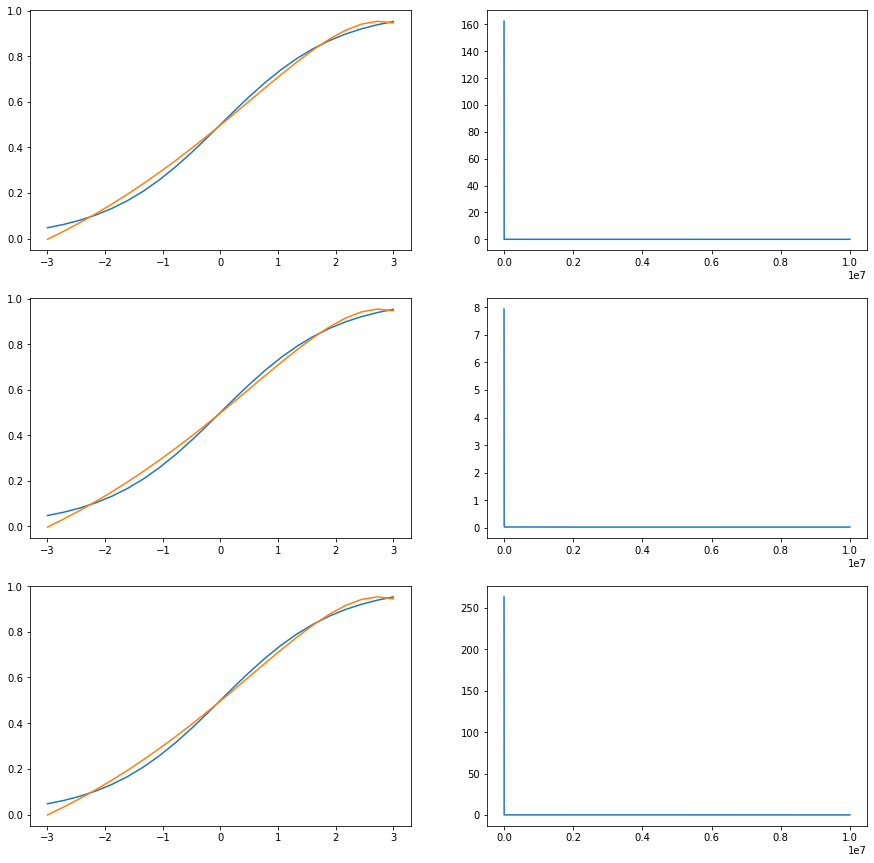

In [13]:
#x = np.linspace(-3, 3, 100) 
b=3
n=40
co1=2
co2=1

p1=np.linspace(-b,-0.5,int(n/4))
p2=np.linspace(-0.5,0.5,int(n/2))
p3=np.linspace(0.5,b,int(n/4))
x=np.hstack([p1,p2,p3])

y=sigmoid(x)
x=x.reshape(len(x),1)
max_iteration=10000000

d_coeff=co1/n
d2_coeff=co2/n

weights=[]
vors=[]
losses=[]
fig, ax=plt.subplots(3,2,figsize=(15,15))
for i,n in enumerate([5,6,10]):
    w,v,l=gradient_descent_with_moments(num_of_exps=n, max_iteration=max_iteration, step_coeff=1e-4,d_coeff=d_coeff,d2_coeff=d2_coeff)
    weights.append(w.reshape(-1))
    vors.append(v.reshape(-1))
    losses.append(l)
    
    x2=x.reshape(-1)
    y_hat=utility(x2,weights[i],vors[i])
    
    ax[i][0].plot(x2,y)
    ax[i][0].plot(x2,y_hat)
    
    iteration=np.arange(0,max_iteration,100)
    ls=np.array(losses[i])[iteration]
    ax[i][1].plot(iteration,ls)

new

In [14]:
weights

[array([ 0.38128631,  0.40403653, -0.42755153, -0.18214049,  0.32200875]),
 array([ 0.38033923,  0.3774375 , -0.3955348 , -0.02763302,  0.34378259,
        -0.18087364]),
 array([ 0.62219488,  0.18214063, -0.17484424,  0.30575816, -0.07484812,
        -0.28949106, -0.44413773,  0.01705158,  0.07223255,  0.28131444])]

In [15]:
vors

[array([ 0.29061874,  0.28760981, -0.00912803,  0.65379036,  0.29824003]),
 array([ 0.2550778 ,  0.30371825, -0.01951435,  0.15592575,  0.32528071,
         0.65876848]),
 array([0.24631027, 0.45009366, 0.22906997, 0.35625526, 0.59987246,
        0.59251791, 0.00472075, 0.41982117, 0.3017966 , 0.33680107])]

In [18]:
weights[1]

array([-0.25046646,  0.18590299, -0.08531054, -0.23623407,  0.42735664,
        0.45522382])

In [20]:
vors[1]

array([-0.07730454,  0.45199731,  0.37213087,  0.6598794 ,  0.35899183,
        0.30494942])

In [21]:
weights[2]

array([ 0.52488632, -0.10449565, -0.23835465, -0.20814827, -0.16334452,
       -0.21585422, -0.26200274,  0.61803315,  0.62066053, -0.07828282])

In [22]:
vors[2]

array([ 0.48135504,  0.55935731,  0.42888261,  0.63587011,  0.53726785,
        0.61792362, -0.01439164,  0.34985281,  0.47029876,  0.47922909])